*Import Libraries*

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

*Reading in Datasets*

In [6]:
episodes_df = pd.read_csv('community_episodes.csv')
imdb_df = pd.read_csv('community_imdb.csv')

episodes_df.head(10)


,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,Pilot,Anthony Russo & Joe Russo,Dan Harmon,2009-09-17,100,7890000.0
1,1,2,2,Spanish 101,Joe Russo,Dan Harmon,2009-09-24,101,5390000.0
2,1,3,3,Introduction to Film,Anthony Russo,Tim Hobert & Jon Pollack,2009-10-01,102,5860000.0
3,1,4,4,Social Psychology,Anthony Russo,Liz Cackowski,2009-10-08,104,4870000.0
4,1,5,5,Advanced Criminal Law,Joe Russo,Andrew Guest,2009-10-15,105,5010000.0
5,1,6,6,"Football, Feminism and You",Joe Russo,Hilary Winston,2009-10-22,103,5180000.0
6,1,7,7,Introduction to Statistics,Justin Lin,Tim Hobert & Jon Pollack,2009-10-29,106,5320000.0
7,1,8,8,Home Economics,Anthony Russo,Lauren Pomerantz,2009-11-05,107,5450000.0
8,1,9,9,Debate 109,Joe Russo,Tim Hobert,2009-11-12,109,5090000.0
9,1,10,10,Environmental Science,Seth Gordon,Zach Paez,2009-11-19,108,4860000.0


In [5]:
imdb_df = imdb_df[['title', 'original_air_date', 'imdb_rating', 'total_votes', 'desc']]

community_df = episodes_df.merge(imdb_df, how='left', on=['title', 'original_air_date'])

community_df.head(10)

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers,imdb_rating,total_votes,desc
0,1,1,1,Pilot,Anthony Russo & Joe Russo,Dan Harmon,2009-09-17,100,7890000.0,7.7,4624.0,An ex-lawyer is forced to return to community ...
1,1,2,2,Spanish 101,Joe Russo,Dan Harmon,2009-09-24,101,5390000.0,7.8,4034.0,Jeff takes steps to ensure that Britta will be...
2,1,3,3,Introduction to Film,Anthony Russo,Tim Hobert & Jon Pollack,2009-10-01,102,5860000.0,8.2,3978.0,Britta comes between Abed and his father when ...
3,1,4,4,Social Psychology,Anthony Russo,Liz Cackowski,2009-10-08,104,4870000.0,8.1,3665.0,Jeff and Shirley bond by making fun of Britta'...
4,1,5,5,Advanced Criminal Law,Joe Russo,Andrew Guest,2009-10-15,105,5010000.0,7.8,3506.0,Señor Chang is on the hunt for a cheater and t...
5,1,6,6,"Football, Feminism and You",Joe Russo,Hilary Winston,2009-10-22,103,5180000.0,7.7,3446.0,Jeff talks Troy into playing for the college's...
6,1,7,7,Introduction to Statistics,Justin Lin,Tim Hobert & Jon Pollack,2009-10-29,106,5320000.0,8.7,4038.0,Will Jeff blow off Annie's Halloween party and...
7,1,8,8,Home Economics,Anthony Russo,Lauren Pomerantz,2009-11-05,107,5450000.0,7.9,3376.0,"When Jeff loses his home and his car, he is fo..."
8,1,9,9,Debate 109,Joe Russo,Tim Hobert,2009-11-12,109,5090000.0,8.8,4069.0,Jeff reluctantly agrees to be Annie's debate p...
9,1,10,10,Environmental Science,Seth Gordon,Zach Paez,2009-11-19,108,4860000.0,8.2,3420.0,Jeff hangs out with Senor Chang to get out of ...


*Which seasons have the highest IMDb ratings?*

Text(0.5, 1.0, 'IMDb Ratings for Community episodes')

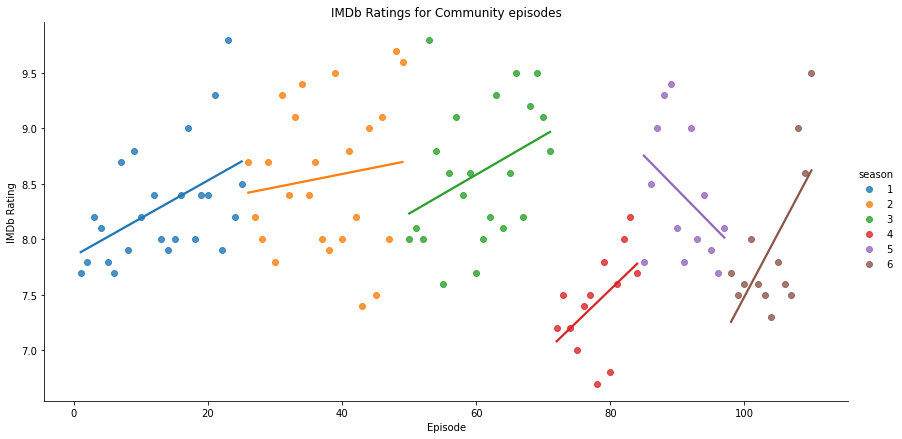

In [7]:
sns.lmplot(x="episode_num_overall", y="imdb_rating", hue="season", data=community_df, height=6, aspect=2, ci=None)
plt.xlabel("Episode")
plt.ylabel("IMDb Rating")
plt.title("IMDb Ratings for Community episodes")

*It's clear that fans of the show including me liked the first three seasons the most. Season 4 was when a lot of the creative team started to leave the show, including series creator and showrunner Dan Harmon and two of the primary directors and executive producesrs during the early seasons, the Russo brothers. It's also when the first regular cast member, Chevy Chase, would leave the show, followed by Donald Glover in season 5. 
Season 6 starts out with among the lowest ratings, but the series does finish relatively strong.*

*Who is the fan-favorite Community director?*

<AxesSubplot:title={'center':'Community Directors by Average IMDb Rating'}>

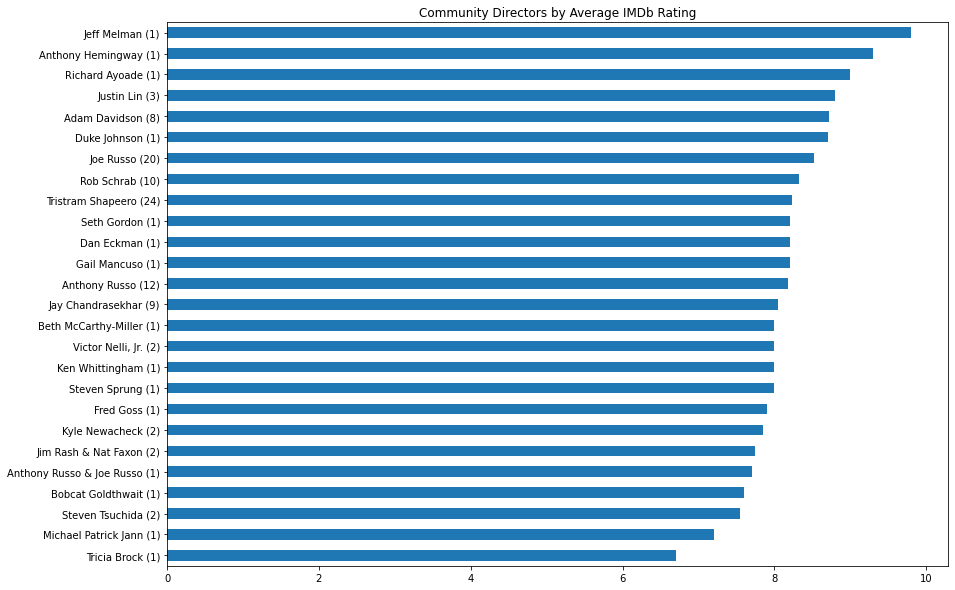

In [8]:
best_director = community_df.groupby('directed_by')['imdb_rating'].agg(['mean', 'count']).sort_values(by='mean')

# combine the director names with their episode counts
labels = ['{} ({})'.format(name, best_director.loc[name, 'count']) for name in best_director.index]
best_director.index = labels

best_director.plot(kind='barh', figsize=(14,10), y='mean', legend=False,
                   title="Community Directors by Average IMDb Rating")

*Jeff Melman has the highest rating for directing only one (excellent) season 3 episode, Remedial Chaos Theory.It is also my favorite epsiode as it deals multidimensional relativity theory. Not surprisingly, one of the Russo brothers is the top director with more than 10 episodes. He directed 20 episodes by himself (plus the pilot with his brother) for an average rating over 8.0.*

*Community is a great show,one of a kind. You should check it out if you haven't yet.*
